In [1]:
import os
import cv2
import numpy as np
import pathlib
import shutil
from imutils import paths
from skimage import transform
from skimage import data
import skimage.io
import matplotlib.pyplot as plt
import os
import numpy as np
from skimage.color import rgb2gray
import random
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
root_dir = '/content/drive/MyDrive/ML/BISINDO'
root_dir

'/content/drive/MyDrive/ML/BISINDO'

In [4]:
import string
for letter in string.ascii_uppercase:
    source_path = os.path.join(root_dir, letter)
    print(f"There are {len(os.listdir(source_path))} images of {letter}.")

There are 12 images of A.
There are 12 images of B.
There are 12 images of C.
There are 12 images of D.
There are 12 images of E.
There are 12 images of F.
There are 12 images of G.
There are 12 images of H.
There are 12 images of I.
There are 12 images of J.
There are 12 images of K.
There are 12 images of L.
There are 12 images of M.
There are 12 images of N.
There are 12 images of O.
There are 12 images of P.
There are 12 images of Q.
There are 12 images of R.
There are 12 images of S.
There are 12 images of T.
There are 12 images of U.
There are 12 images of V.
There are 12 images of W.
There are 12 images of X.
There are 12 images of Y.
There are 12 images of Z.


In [5]:
#define new directory for exercise
exercise_path = '/content/drive/MyDrive/ML/latihan'
exercise_path

'/content/drive/MyDrive/ML/latihan'

In [6]:
#define sub directory training and validation
sub_dir_training = 'training'
sub_dir_validation = 'validation'

alphabets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

# create training and validation directories for each alphabet
for alphabet in alphabets:
    sub_dir_training_alphabet = os.path.join(exercise_path, sub_dir_training, alphabet)
    os.makedirs(sub_dir_training_alphabet, exist_ok=True)

for alphabet in alphabets:
    sub_dir_val_alphabet = os.path.join(exercise_path, sub_dir_validation, alphabet)
    os.makedirs(sub_dir_val_alphabet, exist_ok=True)

In [7]:
import shutil
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt


def create_train_val_dirs(root_path):
  #create directories foe each alphabet in training and validation
  try:
    os.makedirs(os.path.join(exercise_path, sub_dir_training), exist_ok=True)
    for letter in range(ord('A'), ord('Z')+1):
        os.makedirs(os.path.join(exercise_path, sub_dir_training, chr(letter)), exist_ok=True)
    os.makedirs(os.path.join(exercise_path, sub_dir_validation), exist_ok=True)
    for letter in range(ord('A'), ord('Z')+1):
        os.makedirs(os.path.join(exercise_path, sub_dir_validation, chr(letter)), exist_ok=True)
  except:
    print("There were some issues occured here")

try:
  create_train_val_dirs(root_path=exercise_path)
except FileExistsError:
  print("There is some issues occured here")

In [8]:
#testing create_train_val_dirs function
#os.walk is for generating file names
for exercise_path, dirs, files in os.walk(exercise_path):
  for subdir in dirs:
    print(os.path.join(exercise_path, subdir))

/content/drive/MyDrive/ML/latihan/training
/content/drive/MyDrive/ML/latihan/validation
/content/drive/MyDrive/ML/latihan/training/A
/content/drive/MyDrive/ML/latihan/training/B
/content/drive/MyDrive/ML/latihan/training/C
/content/drive/MyDrive/ML/latihan/training/D
/content/drive/MyDrive/ML/latihan/training/E
/content/drive/MyDrive/ML/latihan/training/F
/content/drive/MyDrive/ML/latihan/training/G
/content/drive/MyDrive/ML/latihan/training/H
/content/drive/MyDrive/ML/latihan/training/I
/content/drive/MyDrive/ML/latihan/training/J
/content/drive/MyDrive/ML/latihan/training/K
/content/drive/MyDrive/ML/latihan/training/L
/content/drive/MyDrive/ML/latihan/training/M
/content/drive/MyDrive/ML/latihan/training/N
/content/drive/MyDrive/ML/latihan/training/O
/content/drive/MyDrive/ML/latihan/training/P
/content/drive/MyDrive/ML/latihan/training/Q
/content/drive/MyDrive/ML/latihan/training/R
/content/drive/MyDrive/ML/latihan/training/S
/content/drive/MyDrive/ML/latihan/training/T
/content/dri

In [9]:
# Define the source directories for each alphabet
alphabet_dirs = {chr(letter): f"/content/drive/MyDrive/ML/BISINDO/{chr(letter)}" for letter in range(ord('A'), ord('Z')+1)}

#define the training directory
training_dirs = "/content/drive/MyDrive/ML/latihan/training"
validation_dirs = "/content/drive/MyDrive/ML/latihan/validation"

#define the train split
train_split = 0.8
val_split = 0.2

In [10]:
img_path = list(paths.list_images(root_dir))
#shuffle the images
random.seed(42)
random.shuffle(img_path)

In [11]:
split_point = int(train_split * len(img_path))
train_path = img_path[:split_point]
val_path = img_path[split_point:]

datasets = [
    ("training", train_path, training_dirs),
    ("validation", val_path, validation_dirs)
]

In [12]:
#building datasets
for (dType, image_path, label_output) in datasets:
    # showing info 
    print("Creating '{}' split".format(dType))
    
    # looping the input image
    for inputPath in image_path:
      #load the images with label correspondence its folder
      file_name = inputPath.split(os.path.sep)[-1]
      label_name = inputPath.split(os.path.sep)[-2]
      
      # build the path to the label directory
      label_path = os.path.sep.join([label_output, label_name])
      
      # if label output is not exist then create
      if not os.path.exists(label_path):
        print("creating {}' directory".format(label_path))
        os.makedirs(label_path, exist_ok=True)
      
      # join the path and copy image
      copy_file = os.path.sep.join([label_path, file_name])
      shutil.copy2(inputPath, copy_file)

Creating 'training' split
Creating 'validation' split


In [13]:
train_dir = pathlib.Path('/content/drive/MyDrive/ML/latihan/training')
val_dir = pathlib.Path('/content/drive/MyDrive/ML/latihan/validation')


In [14]:
total_train = len(list(train_dir.glob('*/*')))
total_val = len(list(val_dir.glob('*/*')))


print("Total training set:", total_train)
print("Total validation set:", total_val)


Total training set: 249
Total validation set: 63


In [15]:
classes = np.array([item.name for item in train_dir.glob('*')])
classes

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype='<U1')

In [16]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [17]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(8):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])

      #label contains one hot encoded labels
      plt.title(classes[label_batch[n]==1][0].title())
      plt.axis('off')


In [18]:
BATCH_SIZE = 8
IMG_SIZE = 150
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#instantiate ImageDataGenerator in training images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.06,
    shear_range=0.1,
    zoom_range=0.01,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=str(train_dir),
                                                     target_size=(IMG_SIZE,IMG_SIZE),
                                                     class_mode='categorical',
                                                     shuffle=True)
#instantiate ImageDataGenerator in training images
val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.06,
    shear_range=0.1,
    zoom_range=0.01,
    fill_mode='nearest')

val_generator = val_datagen.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=str(val_dir),
                                                     target_size=(IMG_SIZE,IMG_SIZE),
                                                     class_mode='categorical',
                                                     shuffle=True)

Found 249 images belonging to 26 classes.
Found 63 images belonging to 26 classes.


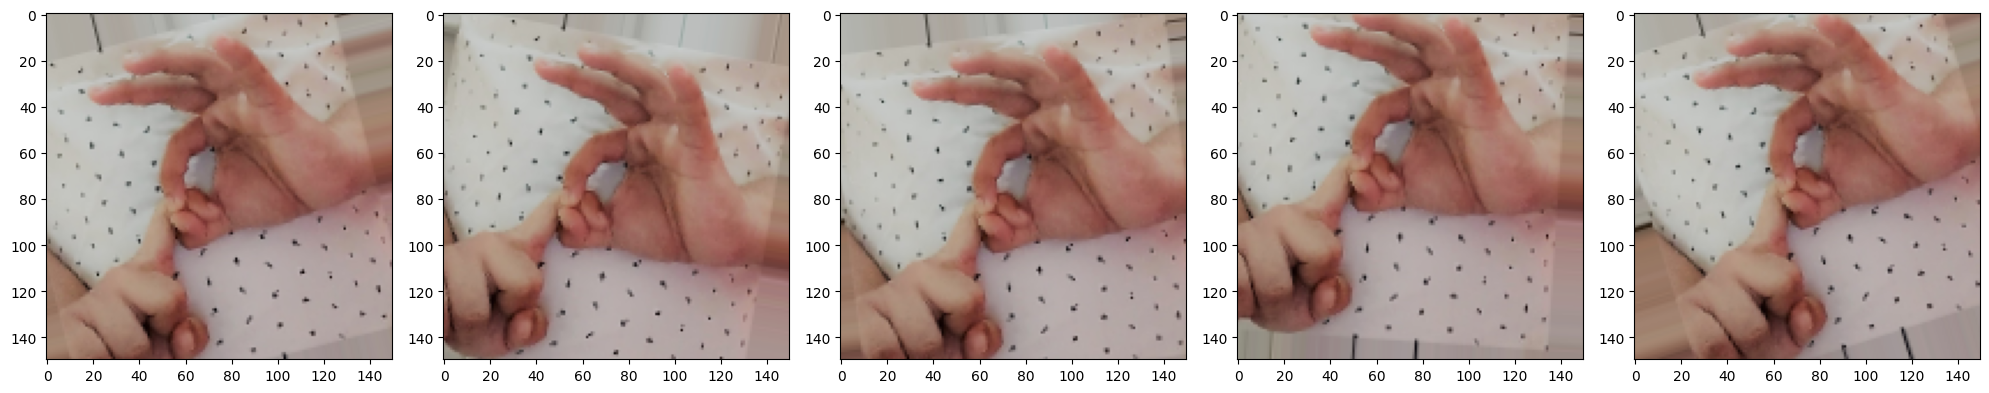

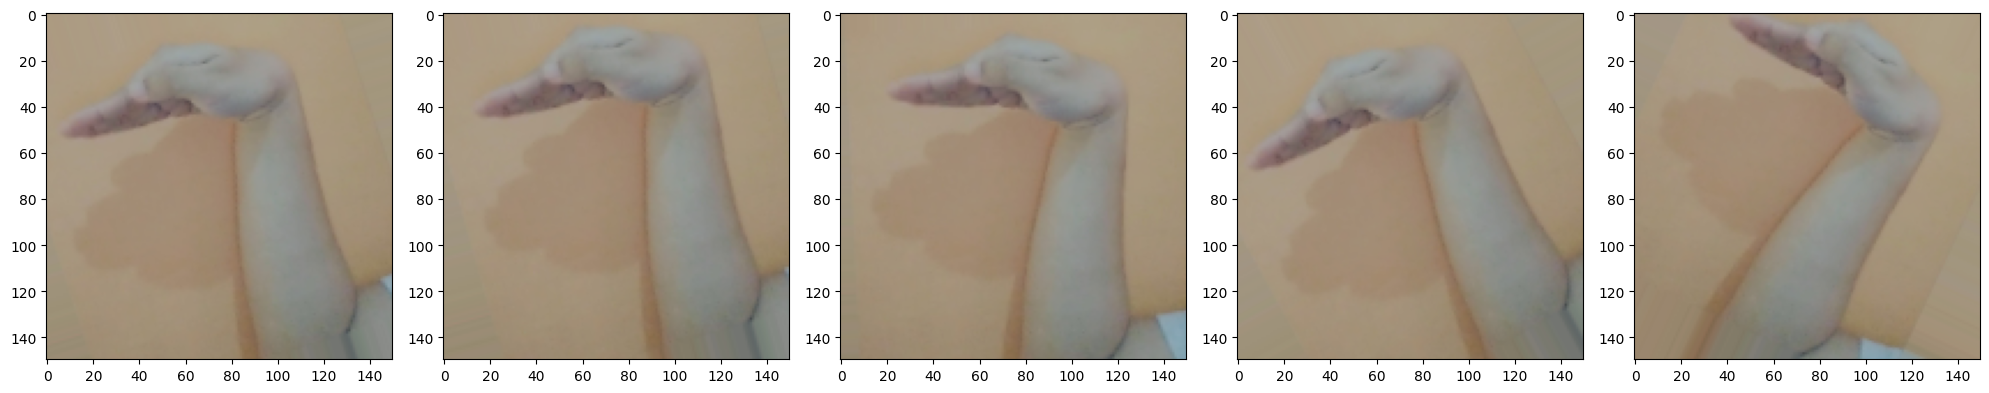

In [19]:
augmented_train_images = [train_generator[3][0][0] for i in range(5)]
plotImages(augmented_train_images)

augmented_val_images = [val_generator[3][0][0] for i in range(5)]
plotImages(augmented_val_images)

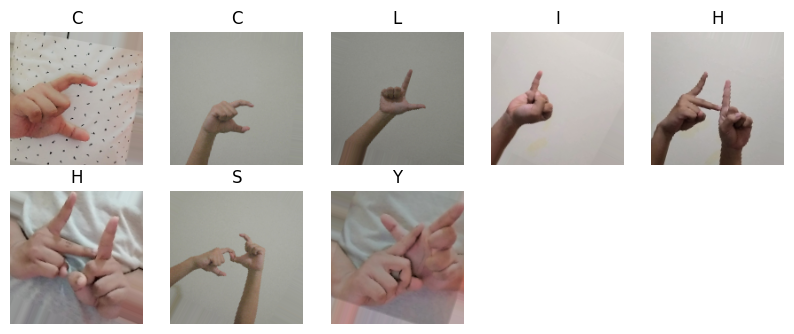

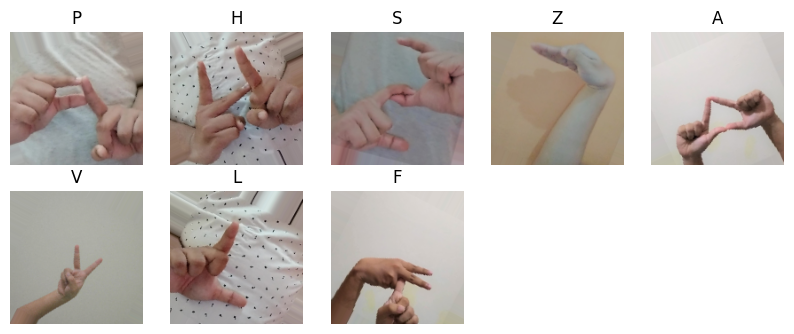

In [20]:
image_batch, label_batch = next(train_generator)
show_batch(image_batch, label_batch)

image_batch, label_batch = next(val_generator)
show_batch(image_batch, label_batch)

In [21]:
# # Function to delete all files in a directory if we want to run multiply times
# def delete_files_in_directory(directory):
#     for file in os.scandir(directory):
#         if file.is_file():
#             os.remove(file.path)

# # Delete all files in the train, val, and test directories
# delete_files_in_directory(training_dirs)
# delete_files_in_directory(validation_dirs)

CREATE MODEL

In [22]:
def create_model():

  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(units=512, activation='relu'),
      tf.keras.layers.Dense(units=26, activation='softmax')
  ])
  
  from tensorflow.keras.optimizers import RMSprop
  model.compile(optimizer=RMSprop(learning_rate=0.001),
                loss= 'categorical_crossentropy',
                metrics = ['accuracy'])
  

  return model


In [23]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [25]:
history = model.fit(train_generator,
                    epochs = 100,
                    verbose=1,
                    validation_data=val_generator)

Epoch 1/100
32/32 [==============================] - 27s 834ms/step - loss: 3.2699 - accuracy: 0.0602 - val_loss: 3.2831 - val_accuracy: 0.0000e+00
Epoch 2/100
32/32 [==============================] - 27s 845ms/step - loss: 3.2577 - accuracy: 0.0522 - val_loss: 3.3230 - val_accuracy: 0.0476
Epoch 3/100
32/32 [==============================] - 31s 984ms/step - loss: 3.2109 - accuracy: 0.0884 - val_loss: 3.2279 - val_accuracy: 0.0476
Epoch 4/100
32/32 [==============================] - 26s 813ms/step - loss: 2.9013 - accuracy: 0.1446 - val_loss: 3.0325 - val_accuracy: 0.1111
Epoch 5/100
32/32 [==============================] - 25s 800ms/step - loss: 2.4523 - accuracy: 0.2811 - val_loss: 2.4849 - val_accuracy: 0.3016
Epoch 6/100
32/32 [==============================] - 27s 842ms/step - loss: 2.2097 - accuracy: 0.3092 - val_loss: 2.1914 - val_accuracy: 0.3016
Epoch 7/100
32/32 [==============================] - 27s 816ms/step - loss: 2.0431 - accuracy: 0.3815 - val_loss: 2.2003 - val_accur

**EVALUATE MODEL**

In [26]:
train_acc = model.evaluate(train_generator)
val_acc = model.evaluate(val_generator)
print(train_acc)
print(val_acc)

8/8 [==============================] - 4s 483ms/step - loss: 0.5474 - accuracy: 0.8571
[0.05777563899755478, 0.9799196720123291]
[0.5474023818969727, 0.8571428656578064]


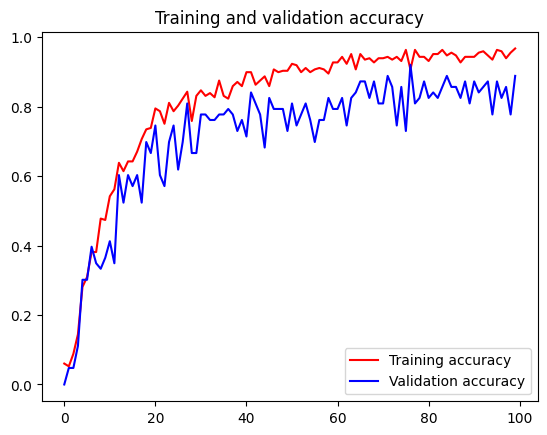

<Figure size 640x480 with 0 Axes>

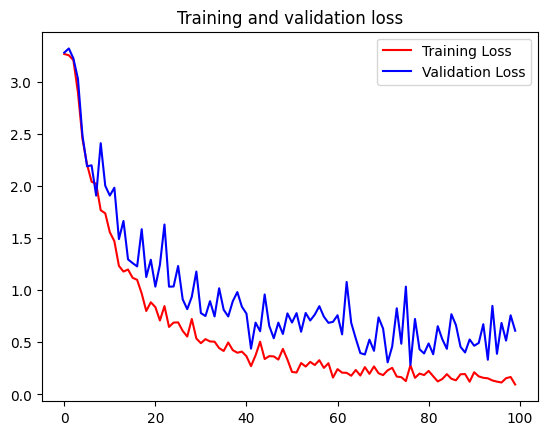

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

#loss
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.show()

# **NOTE**

*   Considering using Callbacks
*   Considering using pretrained model such as mobilenet
*   considering using new datasets
*   learn again to save the model in h5 and deployment
*   Considering using test set
*   use confusion matrix
*   this old datasets is from kaggle






